# CISC 452 Assignment 2 - Backpropagation (100 points)  

Please put your name and student id

    Yanzhang Ma, #20090412

- The notebook file has clearly marked blocks where you are expected to write code. Do not write or modify any code outside of these blocks.
- Do not add or delete cells from the notebook.
- Run all cells, and do not clear out the outputs, before submitting. You will only get credit for code that has been run.
- Make sure to run all the cells from beginning before the submission

## [Part 1 (60 points)](#Part-1)  

### Build Model1 (50 points)  
Use Pytorch to implement a three-layer Neural Network (input layer - hidden layer - output layer) and update the weights with backpropagation  
- 1. Implement forward and calculate the output (10 points)  
- 2. Calculate errors and loss (10 points)  
- 3. Update the weights with backpropagation (20 points)  
- 4. Predict function (5 points)  
- 5. Activation function (Sigmoid function) (5 points)  

### Evaluate Model1 (10 points)  
Use the predict function to predict the labels with the test dataset (5 points)  
Evaluate the prediction results (5 points)   
- Evaluation matrices include confusion matrix, accuracy, recall score, precision and F1 score

## [Part 2 (40 points)](#Part-2)  

Use another machine learning framework (**scikit-learn, Tensorflow and Pytorch**) to build MLP
e.g. 
  1. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
  2. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
  3. https://pytorch.org/tutorials/beginner/examples_nn/polynomial_nn.html#sphx-glr-beginner-examples-nn-polynomial-nn-py
  
### Build Model2-1 (15 points)  
Implement model 2-1 with the same hidden nodes and optimization function as the model in Part 1  
Train and validate model. Use the best model on validation dataset to test on the test dataset  

### Evaluate Model2-1 (5 points)
Evaluate the prediction results (5 points)   
- Evaluation matrices include confusion matrix, accuracy, recall score, precision and F1 score

### Build Model2-2 (15 points)  
Add one more hidden layer (2 hidden layers in total) to the model  
Describe Model 2-2 (number of hidden nodes)  
Train and validate model. Use the best model on validation dataset to test on the test dataset  

### Evaluate Model2-2 (5 points)
Evaluate the prediction results (5 points)   
- Evaluation matrices include confusion matrix, accuracy, recall score, precision and F1 score

In [ ]:
import torch
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST

In [ ]:
# make sure you are using GPU, or you can go to Edit - Notebook settings to select under the Hardware accelerator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# build the dataset (train, validation and test)

def load_MNIST(n_val=10000, n_sample=1000, sample=False):
    n_val = n_val
    n_sample = n_sample
    train = MNIST(root = '.', train = True, download = True)
    test = MNIST(root = '.', train = False, download = True)
    
    # data preprocessing
    x_train, x_test = train.data/255, test.data/255
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)
    y_train = torch.nn.functional.one_hot(train.targets)
    y_test = torch.nn.functional.one_hot(test.targets)

    data_dict = {}
    if sample:
        data_dict['x_train'] = x_train[:-n_val][:n_sample]
        data_dict['y_train'] = y_train[:-n_val][:n_sample]
        data_dict['x_val'] = x_train[-n_val:][:n_sample//10]
        data_dict['y_val'] = y_train[-n_val:][:n_sample//10]
        data_dict['x_test'] = x_test[:n_sample//10]
        data_dict['y_test'] = y_test[:n_sample//10]
    else:
        data_dict['x_train'] = x_train[:-n_val]
        data_dict['y_train'] = y_train[:-n_val]
        data_dict['x_val'] = x_train[-n_val:]
        data_dict['y_val'] = y_train[-n_val:]
        data_dict['x_test'] = x_test
        data_dict['y_test'] = y_test
    return data_dict

In [ ]:
print(data_dict)

{'x_train': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'y_train': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]]), 'x_val': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'y_val': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]]), 'x_test': t

In [ ]:
# you can start with a small sample dataset by setting sample=True
data_dict = load_MNIST(sample=False)
print('Train data shape:', data_dict['x_train'].shape)
print('Train labels shape:', data_dict['y_train'].shape)
print('Validation data shape:', data_dict['x_val'].shape)
print('Validation labels shape:', data_dict['y_val'].shape)
print('Test data shape:', data_dict['x_test'].shape)
print('Test labels shape:', data_dict['y_test'].shape)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Train data shape: torch.Size([50000, 784])
Train labels shape: torch.Size([50000, 10])
Validation data shape: torch.Size([10000, 784])
Validation labels shape: torch.Size([10000, 10])
Test data shape: torch.Size([10000, 784])
Test labels shape: torch.Size([10000, 10])


In [ ]:
# check the data distribution if you use a sample dataset to avoid imbanlance dataset
for i in range(10):
    print(torch.sum(torch.argmax(data_dict['y_test'], dim=1)==i))

tensor(980)
tensor(1135)
tensor(1032)
tensor(1010)
tensor(982)
tensor(892)
tensor(958)
tensor(1028)
tensor(974)
tensor(1009)


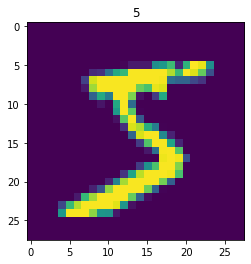

In [ ]:
# plot an example
plt.imshow(data_dict['x_train'][0].reshape(28, 28))
plt.title(data_dict['y_train'][0].argmax().item())
plt.show()

In [ ]:
# TODO: use the predict function to predict the lables with the test dataset
# TODO: evaluate the prediction results (accuracy, recall score, precision and F1 score)
####################################################################################################
# enter code here to calculate the hidden layer output and output layer output
# Write a function to analyze the result
def evaluator(test_y, pred_y):
  tp=0
  tn=0
  fp=0
  fn=0
  for i,j in zip(y_test, y_pred):
      if i==j==1:
          tp+=1
      elif i==j==0:
          tn+=1
      elif (i==0) and (j==1):
          fp+=1
      else:
          fn+=1
            
  confusion_matrix = [[tp,tn],[fp,fn]]
  print("Confusion Matrix:\n",confusion_matrix)
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  print("accuracy:\n",accuracy)
  precision=tp/(tp+fp)
  print("precision:\n",precision)
  recall=tp/(tp+fn)
  print("recall:\n",recall)
  F1_score=(2*tp)/(2*tp+fn+fp)
  print("F1_score:\n",F1_score)

####################################################################################################

In [ ]:
print(torch.sigmoid(torch.tensor([1,2,3,0])))

tensor([0.7311, 0.8808, 0.9526, 0.5000])


## Part 1

In [ ]:
class NN(object):
    def __init__(self, hidden_size, device, dtype=torch.float32):
        self.hidden_size = hidden_size
        self.device = device
        self.dtype = dtype
        self.history = {}
        self.history['train_acc'], self.history['val_acc'], self.history['loss'] = [], [], []
        
    def sigmoid(self, x):
        ####################################################################################################
        # 5. enter code here to implement the activation function
        return torch.sigmoid(x)
        ####################################################################################################

    def train(self, x, y, x_val, y_val, learning_rate=0.001, n_iters=100, batch_size=200, verbose=0):
        n_train = x.shape[0]
        n_val = x_val.shape[0]
        input_size = x.shape[1]
        num_classes = y.shape[1]
        
        self.params = {}
        ####################################################################################################
        # You can change the initialzation here if you want
        self.W1 = torch.randn(input_size, self.hidden_size, dtype=self.dtype, device=self.device) * 0.01
        self.b1 = torch.zeros(self.hidden_size, dtype=self.dtype, device=self.device)
        self.W2 = torch.randn(self.hidden_size, num_classes, dtype=self.dtype, device=self.device) * 0.01
        self.b2 = torch.zeros(num_classes, dtype=self.dtype, device=self.device)
        ####################################################################################################


        # TODO: train the weights with the input data and labels
        for i in range(n_iters):
            loss = 0
            data = getBatch(x, y, batch_size)
            for x_batch, y_batch in data:
                x_batch = x_batch[0]
                y_batch = y_batch[0]
                ####################################################################################################
                # 1. enter code here to calculate the hidden layer output and output layer output
                hidden_input = torch.matmul(x_batch,self.W1)
                hidden_output = self.sigmoid(hidden_input+self.b1)
                final_input = torch.matmul(hidden_output,self.W2)
                final_output = self.sigmoid(final_input+self.b2)

                ####################################################################################################

                ####################################################################################################
                # 2. enter code here to calculate the hidden layer error, output layer error and loss
                output_error = y_batch - final_output
                hidden_error = torch.matmul(output_error,self.W2.T)
                # loss
                loss = output_error**2
                
                ####################################################################################################

               

                # backward
                ####################################################################################################
                # 3. enter code here to update the weights with the errors
                self.W1+=learning_rate*torch.matmul(torch.transpose(hidden_output,0,1),(output_error*final_output*(1.0-final_output)))
                self.W2+=learning_rate*torch.matmul(torch.transpose(x_batch,0,1),(hidden_error*hidden_output*(1.0-hidden_output)))
                
                ####################################################################################################
            
            # calculate the accuracy
            y_pred = self.predict(x)
            train_acc = torch.sum(torch.argmax(y, dim=1) == torch.argmax(y_pred, dim=1)) / n_train
            self.history['train_acc'].append(train_acc)
            self.history['loss'].append(loss)
            
            y_pred = self.predict(x_val)
            val_acc = torch.sum(torch.argmax(y_val, dim=1) == torch.argmax(y_pred, dim=1)) / n_val
            self.history['val_acc'].append(val_acc)
            if verbose:
                print('epoch %d, loss %.4f, train acc %.3f, validation acc %.3f'
                  % (i + 1, loss, train_acc, val_acc))
                
    def predict(self, x):
        ####################################################################################################
        # 4. enter code here to complete the predict function
        # TODO: use the trained weights to predict labels and return the predicted labels
        hidden_output=self.sigmoid(torch.matmul(x,self.W1)+self.b1)
        output=self.sigmoid(torch.matmul(hidden_output,self.W2)+self.b2)
        y_pred=output
        ####################################################################################################
        return y_pred

def getBatch(x, y, batch_size):
    n_epoch = x.shape[0] // batch_size
    for i in range(n_epoch):
        x_batch = x[i * batch_size : (i+1) * batch_size]
        y_batch = y[i * batch_size : (i+1) * batch_size]
        yield x_batch, y_batch
    x_batch = x[(i+1) * batch_size:]
    y_batch = y[(i+1) * batch_size:]    
    yield x_batch, y_batch

In [ ]:
####################################################################################################
# enter code here to tune the parameters
# TODO: set your desired hidden size, learning rate, number of iterations and batch size
hidden_size = 100

model = NN(hidden_size, device)
model.train(data_dict['x_train'].to(device),
            data_dict['y_train'].to(device),
            data_dict['x_val'].to(device),
            data_dict['y_val'].to(device), 
            learning_rate=0.01,
            n_iters=10,
            batch_size=1,
            verbose=1)
####################################################################################################

IndexError: ignored

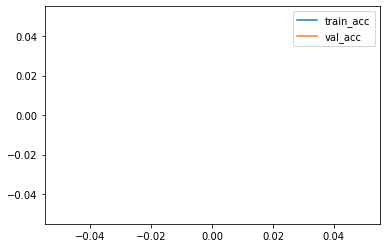

In [ ]:
plt.plot(model.history['train_acc'], label='train_acc')
plt.plot(model.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(data_dict['x_test'].to(device))
evaluator(data_dict['y_test'].argmax(dim=1), torch.argmax(y_pred, dim=1).cpu())

AttributeError: ignored

## Part 2

### Model2-1

In [ ]:
####################################################################################################
# enter code here to implement evaluate Model2-1
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
def model():
  input_dim=Input(784)
  layer1 = Dense(100, activation='sigmoid')(input_dim)
  output = Dense(10, activation= 'sigmoid')(layer1)
  model = tf.keras.Model(inputs=input_dim, outputs=output)
  return model

model1=model()
model1.compile(optimizer=tf.keras.optimizers.Adam(),loss='mean_squared_error',metrics=['accuracy'])

print(model1.summary())
####################################################################################################

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import torch
import tensorflow as tf
import numpy
x_train=data_dict['x_train']
y_train=data_dict['y_train']
x_test=data_dict['x_test']
y_test=data_dict['y_test']
x_val=data_dict['x_val']
y_val=data_dict['y_val']

x_train=tf.convert_to_tensor(x_train.numpy())
y_train=tf.convert_to_tensor(y_train.numpy())
x_test=tf.convert_to_tensor(x_test.numpy())
y_test=tf.convert_to_tensor(y_test.numpy())
x_val=tf.convert_to_tensor(x_val.numpy())
y_val=tf.convert_to_tensor(y_val.numpy())


In [ ]:
epochs=16
batch_size=64
history=model1.fit(x=x_train,y=y_train,batch_size=batch_size,validation_data=(x_val,y_val),epochs=epochs)

Epoch 1/16
782/782 [==============================] - 4s 4ms/step - loss: 0.0390 - accuracy: 0.8095 - val_loss: 0.0180 - val_accuracy: 0.9134
Epoch 2/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0165 - accuracy: 0.9137 - val_loss: 0.0127 - val_accuracy: 0.9315
Epoch 3/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0127 - accuracy: 0.9295 - val_loss: 0.0106 - val_accuracy: 0.9415
Epoch 4/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0107 - accuracy: 0.9394 - val_loss: 0.0092 - val_accuracy: 0.9488
Epoch 5/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0093 - accuracy: 0.9470 - val_loss: 0.0083 - val_accuracy: 0.9544
Epoch 6/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0083 - accuracy: 0.9537 - val_loss: 0.0076 - val_accuracy: 0.9575
Epoch 7/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0075 - accuracy: 0.9584 - val_loss: 0.0071 - val_accuracy: 0.9610
Epoch 

In [ ]:
import numpy
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report

y_predict_raw=model1.predict(x_test)
def evaluator(y_test,y_predict_raw):
  max_predict=numpy.amax(y_predict_raw,axis=1)
  array_predict=numpy.array([max_predict])
  y_predict=(y_predict_raw==numpy.transpose(array_predict))
  #print(np.vectorize(y_predict))
  #print(y_predict)
  print("Confusion matrix:\n",confusion_matrix(y_test.numpy().argmax(axis=1),y_predict.argmax(axis=1)))
  print("\nReport:\n",classification_report(y_test.numpy().argmax(axis=1),y_predict.argmax(axis=1)))
  return None

evaluator(y_test,y_predict_raw)

Confusion matrix:
 [[ 963    0    1    2    0    3    7    2    1    1]
 [   0 1121    4    1    0    1    4    1    3    0]
 [   6    1  994    3    3    2    7    6   10    0]
 [   0    0    6  983    0    6    1    4    6    4]
 [   1    0    2    0  949    0    8    1    2   19]
 [   2    0    1   10    1  857    8    1    8    4]
 [   4    3    1    1    3    4  937    0    5    0]
 [   0    5   14    8    0    1    0  985    3   12]
 [   6    0    1    4    5    3    2    2  949    2]
 [   6    6    1    8   11    3    0    5    5  964]]

Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.96      0.98      0.97       958
       

### Model2-2

In [ ]:
####################################################################################################
# enter code here to implement evaluate Model2-2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
def model():
  input_dim=Input(784)
  layer1 = Dense(100,activation='sigmoid')(input_dim)
  layer2 = Dense(20,activation='relu')(layer1)
  output = Dense(10,activation= 'sigmoid')(layer2)
  model = tf.keras.Model(inputs=input_dim, outputs=output)
  return model

model2=model()
model2.compile(optimizer=tf.keras.optimizers.Adam(),loss='mean_squared_error',metrics=['accuracy'])

print(model2.summary())


####################################################################################################

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_30 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                210       
Total params: 80,730
Trainable params: 80,730
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import torch
import tensorflow as tf
import numpy
x_train=data_dict['x_train']
y_train=data_dict['y_train']
x_test=data_dict['x_test']
y_test=data_dict['y_test']
x_val=data_dict['x_val']
y_val=data_dict['y_val']

x_train=tf.convert_to_tensor(x_train.numpy())
y_train=tf.convert_to_tensor(y_train.numpy())
x_test=tf.convert_to_tensor(x_test.numpy())
y_test=tf.convert_to_tensor(y_test.numpy())
x_val=tf.convert_to_tensor(x_val.numpy())
y_val=tf.convert_to_tensor(y_val.numpy())

In [ ]:
epochs=16
batch_size=64
history=model2.fit(x=x_train,y=y_train,batch_size=batch_size,validation_data=(x_val,y_val),epochs=epochs)

Epoch 1/16
782/782 [==============================] - 4s 4ms/step - loss: 0.0495 - accuracy: 0.7332 - val_loss: 0.0184 - val_accuracy: 0.9071
Epoch 2/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0161 - accuracy: 0.9104 - val_loss: 0.0122 - val_accuracy: 0.9280
Epoch 3/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0115 - accuracy: 0.9346 - val_loss: 0.0096 - val_accuracy: 0.9441
Epoch 4/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0092 - accuracy: 0.9471 - val_loss: 0.0080 - val_accuracy: 0.9529
Epoch 5/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0078 - accuracy: 0.9555 - val_loss: 0.0073 - val_accuracy: 0.9563
Epoch 6/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0069 - accuracy: 0.9601 - val_loss: 0.0068 - val_accuracy: 0.9602
Epoch 7/16
782/782 [==============================] - 3s 4ms/step - loss: 0.0061 - accuracy: 0.9651 - val_loss: 0.0063 - val_accuracy: 0.9635
Epoch 

In [ ]:
import numpy
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report

y_predict_raw=model2.predict(x_test)
def evaluator(y_test,y_predict_raw):
  max_predict=numpy.amax(y_predict_raw,axis=1)
  array_predict=numpy.array([max_predict])
  y_predict=(y_predict_raw==numpy.transpose(array_predict))
  #print(np.vectorize(y_predict))
  #print(y_predict)
  print("Confusion matrix:\n",confusion_matrix(y_test.numpy().argmax(axis=1),y_predict.argmax(axis=1)))
  print("\nReport:\n",classification_report(y_test.numpy().argmax(axis=1),y_predict.argmax(axis=1)))
  return None

evaluator(y_test,y_predict_raw)

Confusion matrix:
 [[ 966    0    1    4    0    2    4    1    1    1]
 [   0 1121    2    3    0    1    4    1    3    0]
 [   5    2  993    9    2    1    5    6    9    0]
 [   1    1    5  980    1    6    0    5   11    0]
 [   1    0    4    1  956    1    7    3    1    8]
 [   5    0    0    9    1  861    9    2    3    2]
 [   7    3    1    1    1    4  940    0    1    0]
 [   0    5   11    6    1    1    0  995    3    6]
 [   4    0    5    6    3    3    6    7  939    1]
 [   6    3    3    9   10    2    0   12    5  959]]

Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.96      0.98      0.97       958
       